In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

In [7]:
data = pd.read_csv('data/clean_data_2.csv')
numeric_vars = ['price_act', 'price_first', 'sq_m', 'bedrooms', 'bathrooms', 'const_year', 'floor', 'st_number']
bolean_vars = ['lift', 'balcony', 'air_con', 'ft_wardrobes', 'terrace', 'exterior']
categorical_vars = ['advertiser', 'type', 'nbhood', 'street','heating']

data.head()

,house_id,price_act,price_first,advertiser,type,nbhood,street,st_number,sq_m,bedrooms,bathrooms,const_year,floor,lift,balcony,air_con,ft_wardrobes,terrace,exterior,heating
0,94283285,750000.0,750000.0,Professional advertiser,flat / apartment,zona bahia blanca,unknown,NaN,262.0,6.0,4.0,1973.0,10.0,1,1,1,1,1,1,individual
1,89113690,575000.0,575000.0,Professional advertiser,duplex,mentidero - teatro falla - alameda,unknown,NaN,135.0,3.0,3.0,1998.0,2.0,0,0,1,1,1,1,individual
2,95291210,320000.0,320000.0,Professional advertiser,flat / apartment,mentidero - teatro falla - alameda,unknown,NaN,190.0,8.0,3.0,1888.0,1.0,0,0,0,0,0,1,no
3,96746079,390000.0,390000.0,Professional advertiser,flat / apartment,mentidero - teatro falla - alameda,unknown,NaN,131.0,3.0,2.0,1796.0,3.0,1,1,1,1,0,1,no
4,96622572,720000.0,720000.0,Professional advertiser,flat / apartment,playa stª mª del mar,unknown,NaN,168.0,3.0,2.0,NaN,2.0,1,0,0,1,0,1,individual


In [798]:
data.dtypes

index             int64
house_id          int64
price_act       float64
price_first     float64
advertiser       object
type             object
nbhood           object
street           object
st_number       float64
sq_m            float64
bedrooms        float64
bathrooms       float64
const_year      float64
floor           float64
lift              int64
balcony           int64
air_con           int64
ft_wardrobes      int64
terrace           int64
exterior          int64
heating          object
dtype: object

In [799]:
sns.set_theme(style="ticks")

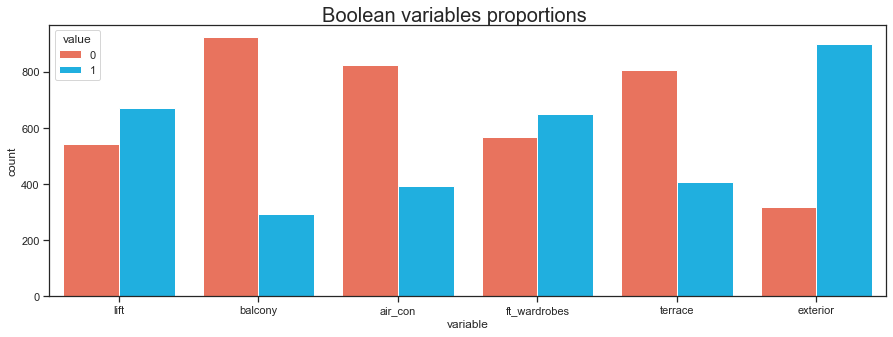

In [800]:
palette ={0: "tomato", 1: "deepskyblue"}
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Boolean variables proportions', fontsize=20, y=0.93)
data_bol = data[bolean_vars]
sns.countplot(x="variable", hue="value", data=pd.melt(data_bol), palette=palette)
plt.show()

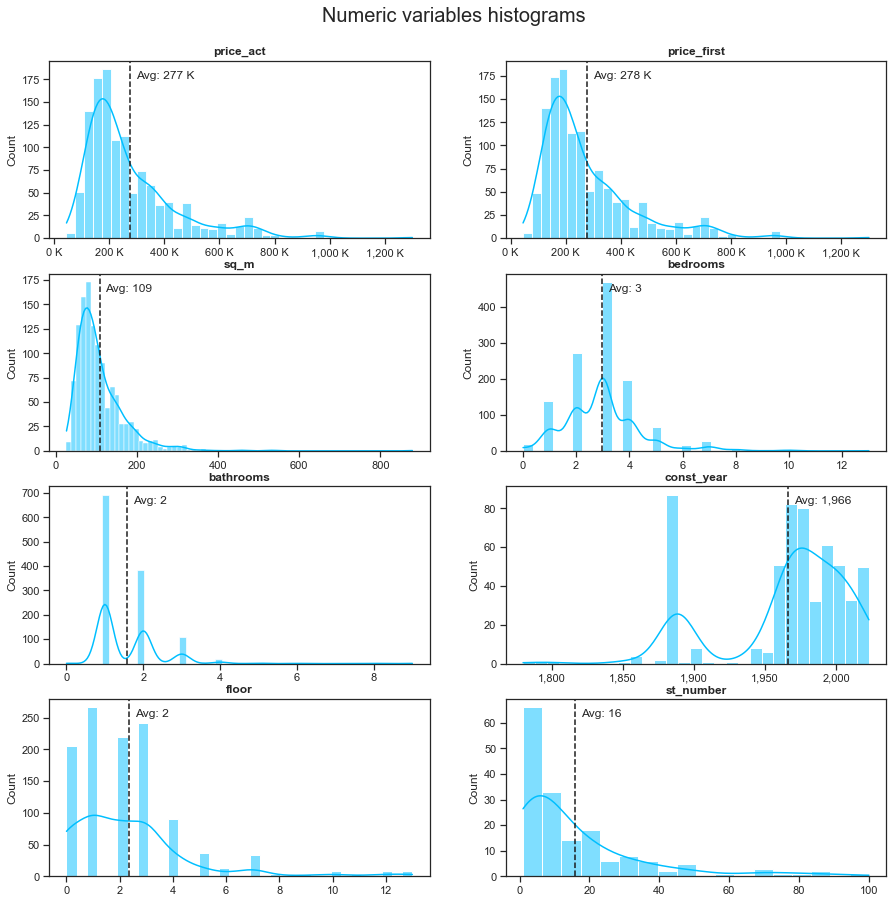

In [801]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()
fig.suptitle('Numeric variables histograms', fontsize=20, y=0.93)

def th_formater(x, pos):
    return f'{x/1000:,.0f} K'

def coma_formater(x, pos):
    return f'{x:,.0f}'
    

for i in range(len(numeric_vars)):
    sns.histplot(ax=axes[i], x=data[numeric_vars[i]], kde=True, color='deepskyblue')
    axes[i].ticklabel_format(useOffset=False, style='plain')
    axes[i].set_xlabel('')
    axes[i].set_title(numeric_vars[i], fontweight="bold")
    
    var_mean = data[numeric_vars[i]].mean()
    axes[i].axvline(var_mean, color='k', linestyle='dashed', linewidth=1.5) # mean line
    annotation_y = axes[i].get_ylim()[1] * 0.9
    anotation_x = ((axes[i].get_xlim()[1] - axes[i].get_xlim()[0]) * 0.1 / 6.75) + var_mean # 6.75 is the length of the xaxis in pixels aprox
        
    # formatting hight xaxis labels
    if max(data[numeric_vars[i]]) > 100000: 
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(th_formater))
        axes[i].annotate(f'Avg: {var_mean/1000:,.0f} K', xy = (anotation_x, annotation_y))
    else:
        axes[i].annotate(f'Avg: {var_mean:,.0f}', (anotation_x, annotation_y))
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(coma_formater))
    



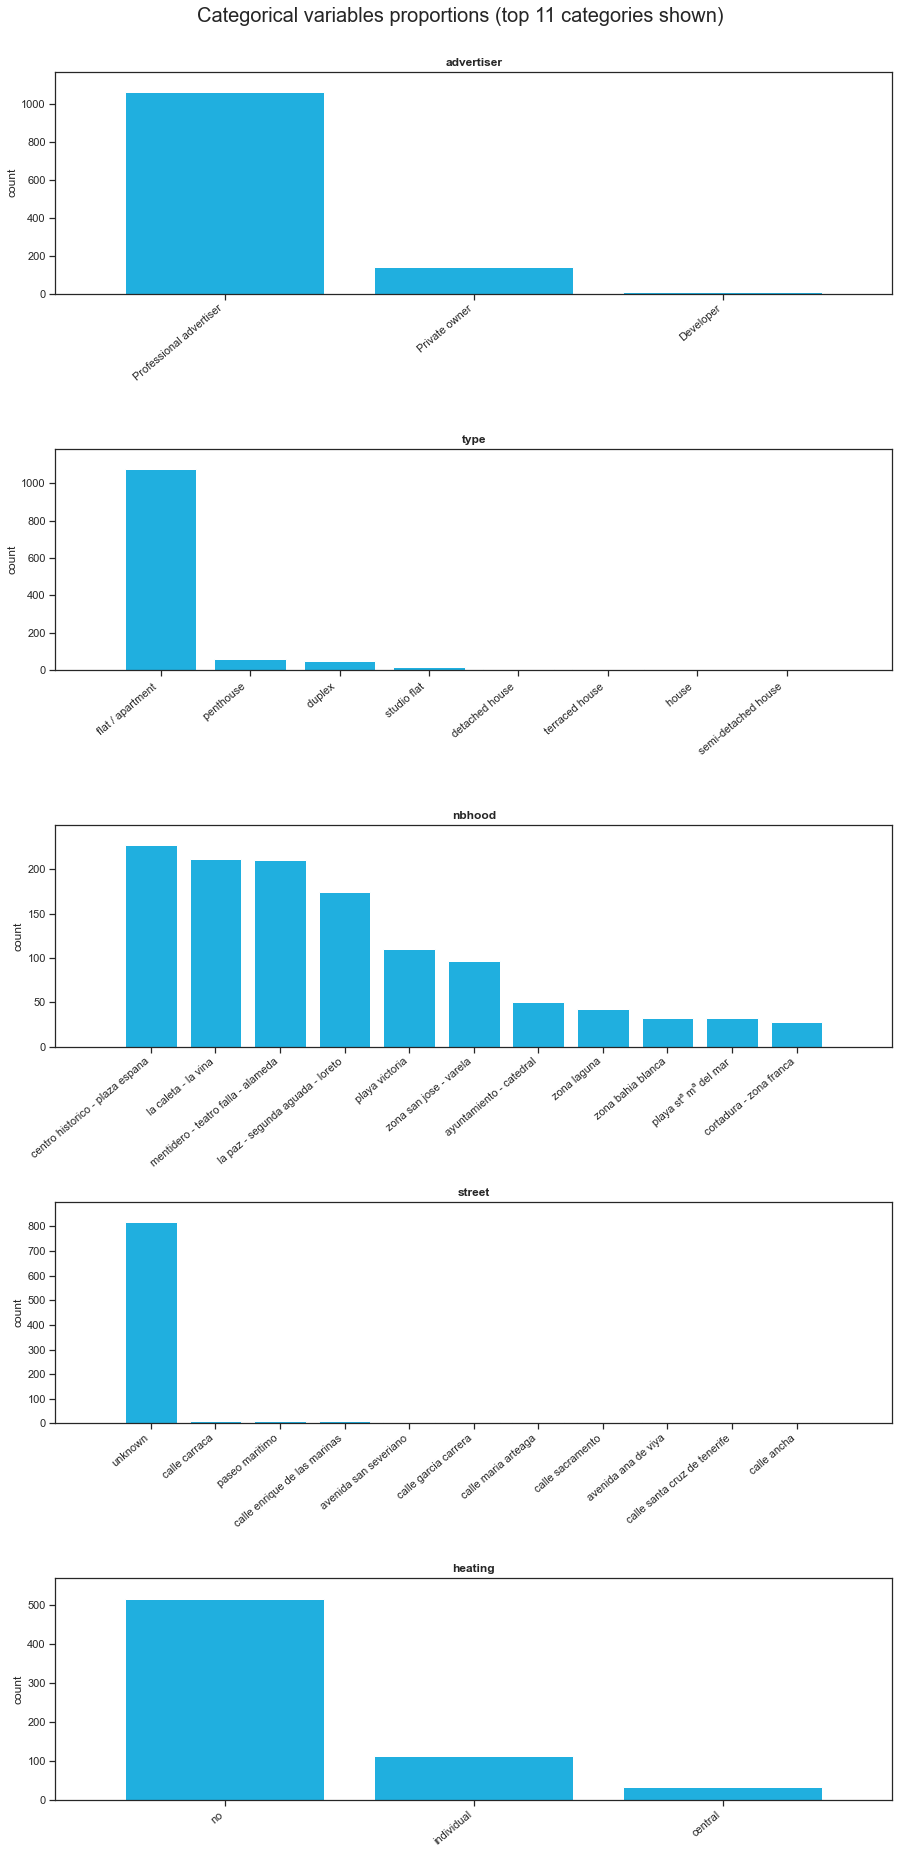

In [802]:
fig, axes = plt.subplots(5, 1, figsize=(15, 30))
axes = axes.flatten()
fig.suptitle('Categorical variables proportions (top 11 categories shown)', fontsize=20, y=0.93) # beacuse is the number of diferent neigborhoods
fig.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)


for i in range(len(categorical_vars)):
    axes[i] = sns.countplot(ax=axes[i], x=categorical_vars[i], data=data, 
                            order = data[categorical_vars[i]].value_counts().index[0:11], color='deepskyblue')
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=40, ha='right')
    axes[i].set_title(categorical_vars[i], fontweight="bold")
    axes[i].margins(0.1)

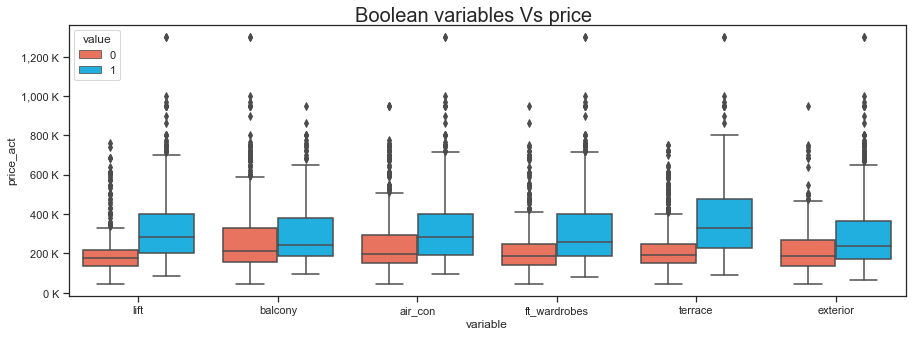

In [803]:
palette ={0: "tomato", 1: "deepskyblue"}
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Boolean variables Vs price', fontsize=20, y=0.93)
data_bol = data[bolean_vars + ['price_act']]
sns.boxplot(x='variable', y='price_act', hue="value", data=data_bol.melt(id_vars='price_act'), palette=palette)
ax.yaxis.set_major_formatter(plt.FuncFormatter(th_formater))
plt.show()

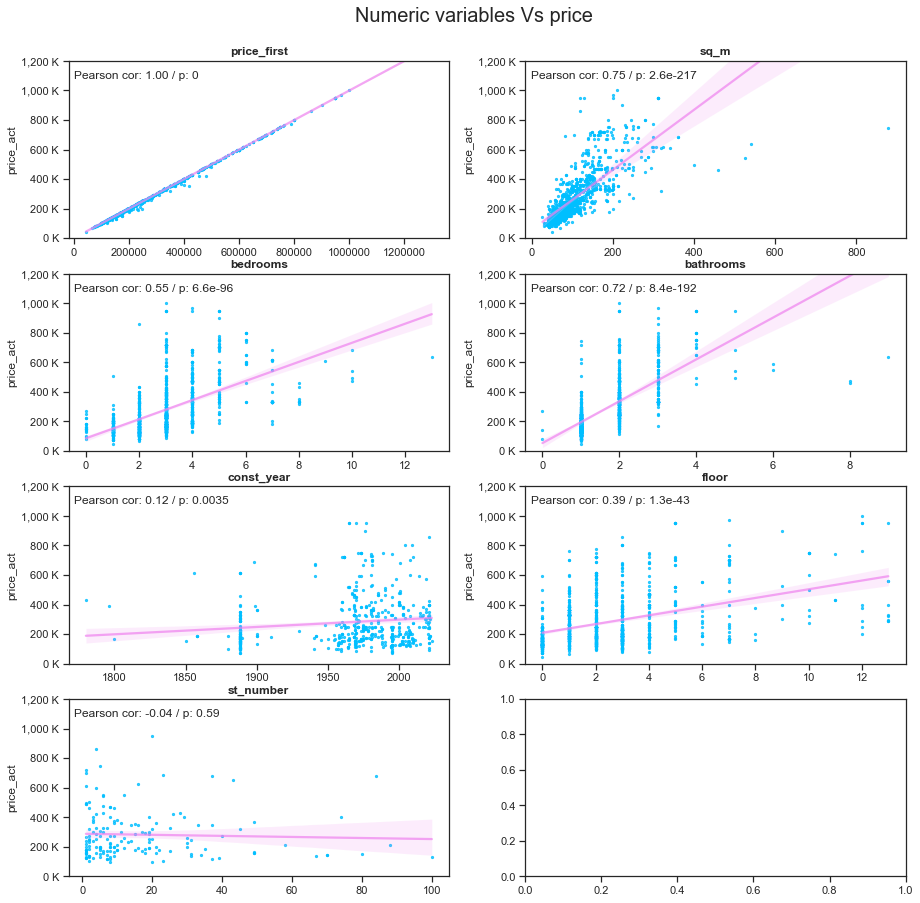

In [804]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()
fig.suptitle('Numeric variables Vs price', fontsize=20, y=0.93)
numeric_vars_no_price_act = [l for l in numeric_vars if l != 'price_act']
for i in range(len(numeric_vars_no_price_act)):
    sns.regplot(ax=axes[i], x=numeric_vars_no_price_act[i], y='price_act', color='deepskyblue', data=data, 
                scatter_kws={'s':5}, line_kws={"color": "violet", 'alpha':0.7})
    axes[i].set_ylim(0, 1200000)
    axes[i].ticklabel_format(useOffset=False, style='plain')
    axes[i].set_xlabel('')
    axes[i].set_title(numeric_vars_no_price_act[i], fontweight="bold")
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(th_formater))
    
    nona_df = data[['price_act', numeric_vars_no_price_act[i]]].dropna() # sp.stats.pearsonr does not accept nan
    r, p = sp.stats.pearsonr(nona_df['price_act'], nona_df[numeric_vars_no_price_act[i]])
    annotation_y = axes[i].get_ylim()[1] * 0.9
    anotation_x = ((axes[i].get_xlim()[1] - axes[i].get_xlim()[0]) * 0.1 / 6.75) + axes[i].get_xlim()[0] # 6.75 is the length of the xaxis in pixels aprox
    axes[i].annotate(f'Pearson cor: {r:,.2f} / p: {p:.2g}', (anotation_x, annotation_y))
    
    

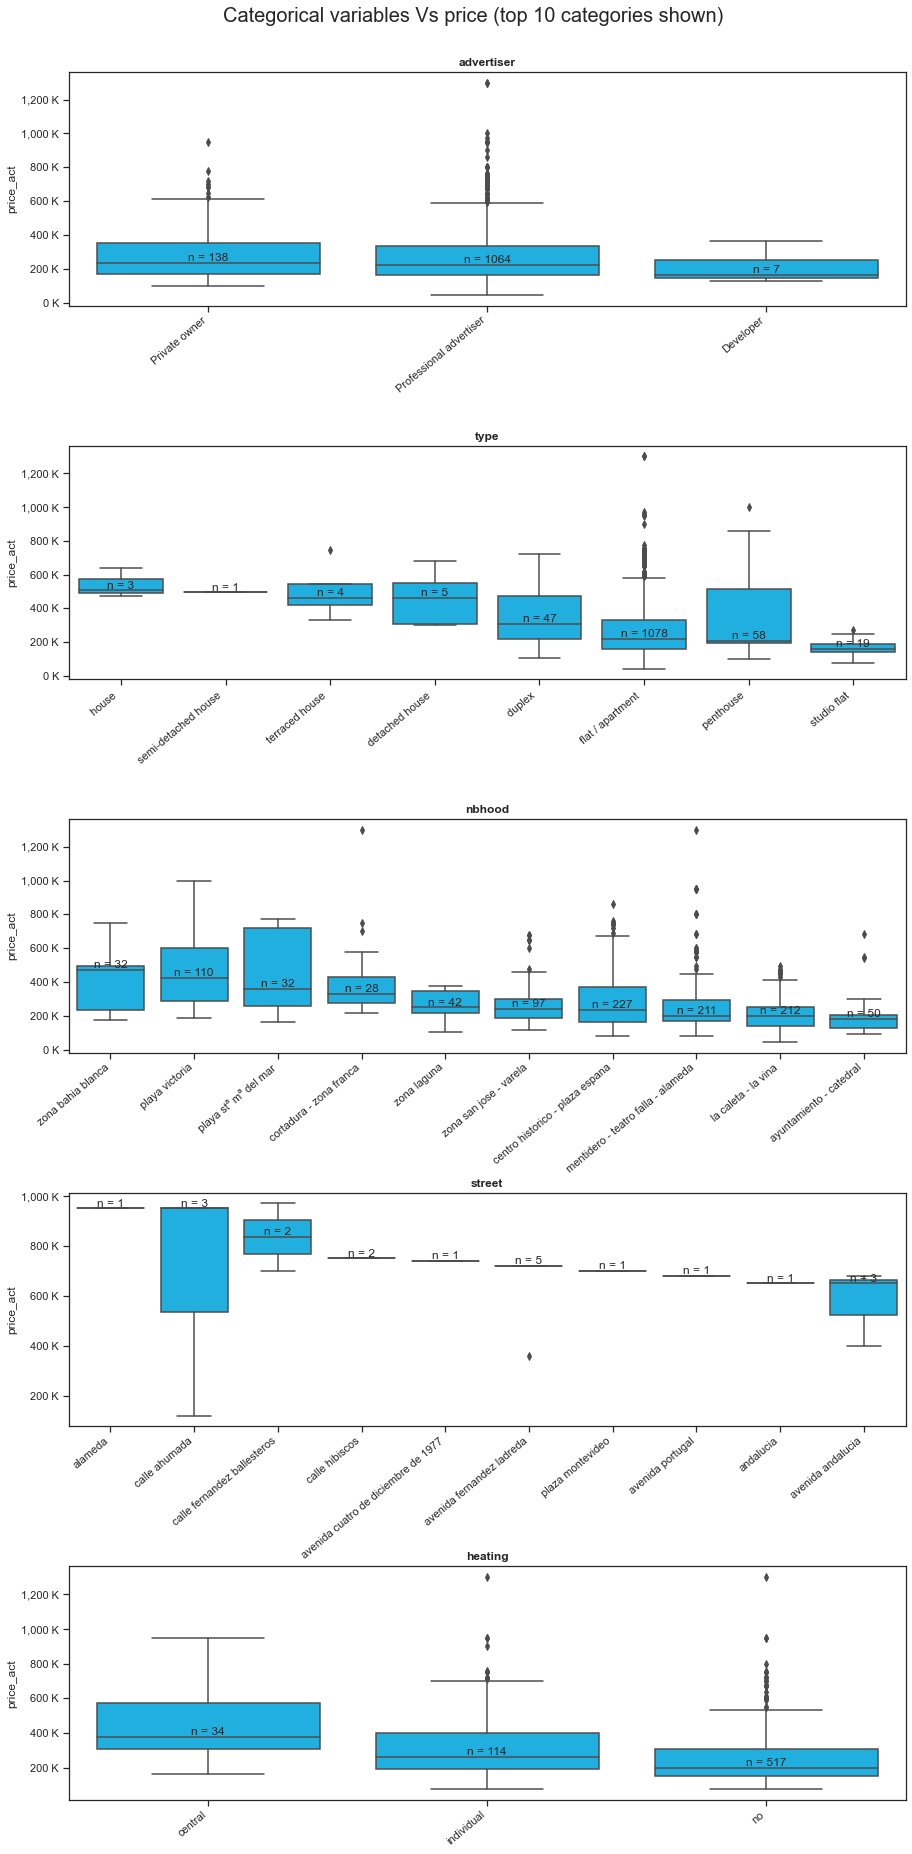

In [809]:
fig, axes = plt.subplots(5, 1, figsize=(15, 30))
axes = axes.flatten()
fig.suptitle('Categorical variables Vs price (top 10 categories shown)', fontsize=20, y=0.93)
fig.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)


for i in range(len(categorical_vars)):
    medians_df_ordered = data[[categorical_vars[i], 'price_act']].groupby(categorical_vars[i]).median().sort_values(by='price_act', ascending=False).head(10)
    order = medians_df_ordered.index
    #print(data[categorical_vars[i]].value_counts()[0:10])
    axes[i] = sns.boxplot(ax=axes[i], x=categorical_vars[i], y='price_act', data=data, 
                            order = order, color='deepskyblue')
    
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(th_formater))
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=40, ha='right')
    axes[i].set_title(categorical_vars[i], fontweight="bold")
    
    # Calculate number of obs per group & median to position labels
    medians = medians_df_ordered.values
    x_axis_vals = axes[i].get_xticks()
    nobs = data[categorical_vars[i]].value_counts()[0:10].values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    anotation_y = ((axes[i].get_ylim()[1] - axes[i].get_ylim()[0]) * 0.05 / 6.25)  +  medians# 6.25 is the hight of the yaxis in pixels aprox
    for j in range(len(medians)):
        n = data[data[categorical_vars[i]] == order[j]].shape[0]
        axes[i].annotate(f'n = {n}', (x_axis_vals[j], anotation_y[j]), horizontalalignment='center')
  

In [97]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, GeometryCollection



In [225]:
#Read the geoJSON file using geopandas
geojson = gpd.read_file('barrios_cadiz.geojson')
geojson=geojson[['id','geometry']] #only select 'coty_code' and 'id' columns

data['price_sq_m'] = data['price_act'] / data['sq_m']
geo_df = data[['nbhood', 'price_sq_m']].groupby("nbhood").agg('describe').droplevel(level=0, axis=1)
geo_df.reset_index(inplace=True)
geo_df = geojson.merge(geo_df, left_on="id", right_on='nbhood').round()
geo_df

,id,geometry,nbhood,count,mean,std,min,25%,50%,75%,max
0,mentidero - teatro falla - alameda,"POLYGON ((-6.30594 36.53528, -6.30498 36.53448...",mentidero - teatro falla - alameda,211.0,2448.0,721.0,1000.0,1943.0,2315.0,2843.0,6190.0
1,la caleta - la vina,"POLYGON ((-6.29547 36.52979, -6.29591 36.53017...",la caleta - la vina,212.0,2261.0,534.0,900.0,1806.0,2222.0,2638.0,3741.0
2,ayuntamiento - catedral,"POLYGON ((-6.29595 36.52842, -6.29435 36.52777...",ayuntamiento - catedral,50.0,2571.0,921.0,1036.0,1937.0,2267.0,2855.0,5370.0
3,playa stª mª del mar,"POLYGON ((-6.28803 36.52586, -6.28835 36.52566...",playa stª mª del mar,32.0,3278.0,744.0,2071.0,2630.0,3225.0,3838.0,4865.0
4,playa victoria,"POLYGON ((-6.27370 36.50075, -6.27443 36.50201...",playa victoria,110.0,3491.0,1064.0,1852.0,2761.0,3305.0,4165.0,7917.0
5,centro historico - plaza espana,"POLYGON ((-6.29248 36.52952, -6.29107 36.53073...",centro historico - plaza espana,227.0,2457.0,916.0,845.0,1896.0,2263.0,2790.0,8415.0
6,zona laguna,"POLYGON ((-6.27792 36.50801, -6.27783 36.50784...",zona laguna,42.0,2850.0,676.0,1981.0,2509.0,2629.0,2970.0,4933.0
7,zona san jose - varela,"POLYGON ((-6.27496 36.50918, -6.27573 36.51082...",zona san jose - varela,97.0,2519.0,484.0,1163.0,2280.0,2484.0,2812.0,4141.0
8,zona bahia blanca,"POLYGON ((-6.28045 36.52108, -6.28035 36.52127...",zona bahia blanca,32.0,2710.0,434.0,1577.0,2530.0,2777.0,2942.0,3472.0
9,la paz - segunda aguada - loreto,"POLYGON ((-6.27167 36.50219, -6.26948 36.50279...",la paz - segunda aguada - loreto,174.0,2294.0,502.0,1470.0,1907.0,2216.0,2649.0,4935.0


In [227]:
m = folium.Map(location=[36.518336, -6.279346], zoom_start=13, tiles = 'cartodbpositron')

folium.Choropleth(
            geo_data='barrios_cadiz.geojson',
            data=geo_df,
            columns=['nbhood', 'mean'],  #Here we tell folium to get the nbhood and plot mean price for each nbhood
            key_on='feature.properties.id', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fips
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.6,
            line_opacity=0.2,
            legend_name='Mean price', #title of the legend
            highlight=True,
            line_color='black').add_to(m) 


# Add Customized Tooltips to the map
folium.features.GeoJson(
                    data=geo_df,
                    name='',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['nbhood', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                        aliases=['nbhood', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(m) 

m